## Query Study on Worldwide Earthquakes within past 24 hours
### Note: All code is at the bottom!

#### Goal
The goal of this project is to extract all earthquakes that have occured all over the world in real time and analyze the data with queries utilizing SQLite.

#### Data
The earthquake data is pulled from the USGS (link below). The USGS provides earthquake data in various feeds: past hour, past 24 hours, past 7 days, past 30 days. This project uses the past 24 hour feed, which is in GeoJSON format. 

#### Method
I created a function (get_recent_earthquakes) that takes the past 24 hour earthquake GeoJSON data and creates a Dataframe using some key properties of the earthquakes. In this study, I am primarily working with location and magnitude of earthquakes. 

After cleaning the dataframe, I created another function that maps the data (plot quakes).

Lastly, I created a function (query_earthquakes) that takes an SQLite query as input and returns the result. 

### Note: All code is at the bottom!

Website for GeoJSON earthquake files!
https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

----

### Run function to look at the 10 most recent earthquakes

In [538]:
get_recent_earthquakes('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson')

,mag,place,time,url,felt,alert,sig,event_type,latitude,longitude,ID,location,class
0,1.70,"Redoubt Volcano, Alaska",1578591239696,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,44,earthquake,60.264300,-153.162800,NaN,Alaska,Minor
1,1.30,"Ester, Alaska",1578590913552,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,26,earthquake,65.088700,-148.634800,NaN,Alaska,Minor
2,1.09,"Parkfield, CA",1578590896130,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,18,earthquake,36.014168,-120.575668,NaN,California,Minor
3,1.70,"Cantwell, Alaska",1578590819029,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,44,earthquake,62.839800,-149.098800,NaN,Alaska,Minor
4,2.69,"Fall City, Washington",1578590416030,https://earthquake.usgs.gov/earthquakes/eventp...,20,None,118,earthquake,47.607000,-121.835333,NaN,Washington,Minor
5,5.40,"Visokoi Island, South Georgia and the South S...",1578590103997,https://earthquake.usgs.gov/earthquakes/eventp...,None,green,449,earthquake,-56.064300,-26.722300,NaN,South Georgia and the South Sandwich Islands,Moderate
6,1.40,"Cantwell, Alaska",1578589755170,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,30,earthquake,63.478500,-151.185700,NaN,Alaska,Minor
7,4.50,"Ndoi Island, Fiji",1578589421406,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,312,earthquake,-20.442900,-177.568100,NaN,Fiji,Light
8,1.30,"Anchorage, Alaska",1578588659828,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,26,earthquake,61.337200,-150.147800,NaN,Alaska,Minor
9,1.66,"The Geysers, CA",1578588647610,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,42,earthquake,38.813499,-122.808334,NaN,California,Minor


### Run function to plot earthquakes
**Color Scale:**

0-1 Magnitude: Dark Purple 

1-2 Magnitude: Blue

2-3 Magnitude: Light Blue

3-4 Magnitude: Light Green

4-5 Magnitude: Orange

5-6 Magnitude: Light Red

6+ Magnitude: Red

In [539]:
plot_quakes()

---

# Queries of Earthquakes within past 24 hours

###  #1. How many earthquakes have there been around the world within the past 24 hours?

In [540]:
query_earthquakes("SELECT count(*) as Earthquakes_Last24Hours from earthquake_dfs")

   Earthquakes_Last24Hours
0                      317


---

###  #2. What location had the most recent earthquake and what was the earthquakes magnitude?

In [556]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs LIMIT 1;")

                      place  Magnitude
0   Redoubt Volcano, Alaska        1.7


---

###  #3. Top 5 locations with most earthquakes in past 24 hours

In [542]:
query_earthquakes("SELECT location,count(place) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC LIMIT 5")

       location  Total_Quakes
0    California           165
1        Alaska            60
2   Puerto Rico            26
3        Hawaii            14
4        Nevada            10


---

###  #4. All earthquakes that occured in Hawaii past 24 hours

In [543]:
query_earthquakes("SELECT place,mag,latitude,longitude FROM earthquake_dfs WHERE location LIKE '%Hawaii%'")

                         place   mag   latitude   longitude
0               Pahala, Hawaii  2.19  19.243834 -155.422836
1              Volcano, Hawaii  1.83  19.410000 -155.274170
2              Volcano, Hawaii  2.16  19.384501 -155.218994
3               Pahala, Hawaii  1.79  19.195499 -155.502670
4               Pahala, Hawaii  1.95  19.220667 -155.438171
5               Pahala, Hawaii  2.15  19.213833 -155.423340
6    Honaunau-Napoopoo, Hawaii  1.98  19.476833 -155.597671
7              Volcano, Hawaii  1.88  19.416834 -155.272507
8    Honaunau-Napoopoo, Hawaii  1.87  19.470667 -155.714172
9               Pahala, Hawaii  2.76  19.213667 -155.411163
10              Pahala, Hawaii  2.06  19.193001 -155.416840
11              Pahala, Hawaii  2.31  19.209833 -155.427338
12              Pahala, Hawaii  2.22  19.211334 -155.409500
13   Honaunau-Napoopoo, Hawaii  2.00  19.483167 -155.580333


---

###  #5. Compute average magnitude and total count for each location that had an earthquake

In [544]:
query_earthquakes("SELECT location, avg(mag) as Avg_Magnitude,count(location) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC")

                                         location  Avg_Magnitude  Total_Quakes
0                                      California       1.085455           165
1                                          Alaska       1.438167            60
2                                     Puerto Rico       3.216538            26
3                                          Hawaii       2.082143            14
4                                          Nevada       0.850000            10
5                                             nan       4.888889             9
6                                        Oklahoma       2.016000             5
7                                       Indonesia       4.650000             4
8                                      Washington       1.332500             4
9                                           Chile       4.500000             3
10                                          Idaho       1.416667             3
11                                        Montana   

###  #6. Compute percentage of earthquakes that occured in California

In [545]:
q3 = """SELECT location,
round(count(case when location LIKE '%California%' then 1 end)*1.0 / count(*),2)*100 as 'percentage(%)' FROM earthquake_dfs
"""

query_earthquakes(q3)

  location  percentage(%)
0   Alaska           52.0


---

###  #7. Location with at least 5 earthquakes with average and maximum magnitudes

In [546]:
query_earthquakes("SELECT location,count(place) as Total_Quakes, avg(mag) as Average_Magnitude,max(mag) as Maximum_Magnitude FROM earthquake_dfs GROUP BY location HAVING count(place) >4.999")

       location  Total_Quakes  Average_Magnitude  Maximum_Magnitude
0        Alaska            60           1.438167               4.00
1    California           165           1.085455               2.70
2        Hawaii            14           2.082143               2.76
3        Nevada            10           0.850000               1.90
4      Oklahoma             5           2.016000               2.35
5   Puerto Rico            26           3.216538               4.70
6           nan             9           4.888889               6.30


---

Let's look at the earthquake magnitude classes according to Michigan Tech University (http://www.geo.mtu.edu/UPSeis/magnitude.html)

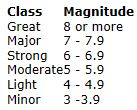

###  #8. Were there any locations that had a 'Strong' earthquake? If so, how many and what places?

In [547]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs WHERE mag > 5.999")

                  

  place  Magnitude
0   nan        6.3


---

###  #9. Count of earthquake class per location

In [548]:
q = """SELECT location, 
sum(case when class = 'Minor' then 1 else 0 end) Minor,
sum(case when class = 'Light' then 1 else 0 end) Light,
sum(case when class = 'Moderate' then 1 else 0 end) Moderate,
sum(case when class = 'Strong' then 1 else 0 end) Strong,
sum(case when class = 'Major' then 1 else 0 end) Major,
sum(case when class = 'Great' then 1 else 0 end) Great
FROM earthquake_dfs GROUP BY location
"""
query_earthquakes(q)

                                         location  Minor  Light  Moderate  \
0                                          Alaska     59      1         0   
1                                            B.C.      1      0         0   
2                                      California    165      0         0   
3                                          Canada      0      1         0   
4                                           Chile      0      3         0   
5                                            Fiji      0      2         0   
6                                          Hawaii     14      0         0   
7                                           Idaho      3      0         0   
8                                       Indonesia      0      4         0   
9                                            Iran      0      1         0   
10                                          Japan      0      1         0   
11                                        Montana      3      0         0   

---

###  #10. All Earthquakes Per Class

In [549]:
query_earthquakes("SELECT class, count(class) FROM earthquake_dfs GROUP BY class")

      class  count(class)
0     Light            27
1     Minor           286
2  Moderate             3
3    Strong             1


---

# Code

In [551]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import json
from geopy.geocoders import Nominatim   #convert an address into lat and log values
import requests  #libaray to handle requests
from pandas.io.json import json_normalize    #transfrom JSON file into a pandas dataframe

import folium
import pandasql as psql

from IPython.display import HTML, display

print('libraries imported')

libraries imported


In [552]:
#This function takes the GeoJSON file of all earthquakes within past 24 hours and puts data into a dataframe
def get_recent_earthquakes(earthquakes):
    data = earthquakes
    
    jsonresults = requests.get(data).json()
    
    earthquake_data = jsonresults['features']
    
    columns = ['mag','place','time','url','felt','alert','sig','event_type','latitude','longitude','ID']
    global earthquake_df
    earthquake_df = pd.DataFrame(columns = columns)
    
    
    for data in earthquake_data:
        mag = data['properties']['mag']
        place = data['properties']['place']
        time = data['properties']['time']
        url = data['properties']['url']
        felt = data['properties']['felt']
        alert = data['properties']['alert']
        sig = data['properties']['sig']
        event_type = data['properties']['type']
        latitude = data['geometry']['coordinates'][1]
        longitude = data['geometry']['coordinates'][0]
    
    #put into df
    
        earthquake_df = earthquake_df.append({'mag':mag,
                   'place':place,
                   'time':time,
                   'url':url,
                   'felt':felt,
                   'alert':alert,
                   'sig':sig,
                   'event_type':event_type,
                   'latitude':latitude,
                   'longitude':longitude},ignore_index = True)
    earthquake_df['place'] = earthquake_df['place'].str.split('of').str[1]
    earthquake_df['location'] = earthquake_df['place'].str.split(',').str[1]
    earthquake_df['location'] = earthquake_df['location'].str.replace('CA','California')
    earthquake_df['class'] = ['Minor' if x >-1 and x<4 else 
                           'Light' if x>=4 and x<5 else 
                           'Moderate' if x>=5 and x<6 else 
                           'Strong' if x>=6 and x<7 else
                           'Major' if x>=7 and x<8 else
                           'Great' for x in earthquake_df['mag']]
    #print('Within the past day, there have been {} earthquakes worldwide'.format(earthquake_df.shape[0]))
    return earthquake_df.head(10)
    

In [553]:
#This function plots all earthquakes within past 24 hours
def plot_quakes():
    lat = 48.049439
    long =-2.974767
    world_map = folium.Map(location = [lat,long],zoom_start = 2)
    
    # instantiate a feature group for the incidents in the dataframe
    #incidents = folium.map.FeatureGroup()

    # loop through df and add each to the incidents feature group
    for lat, lng, mag in zip(earthquake_dfs.latitude, earthquake_dfs.longitude,earthquake_dfs.mag):
        folium.Marker(location = [lat, lng],popup = str(mag),icon = folium.Icon(color = color(mag))).add_to(world_map)
                
        

    # add incidents to map and show
    display(world_map)

In [554]:
#This function takes a SQLite query and returns the results
def query_earthquakes(query):
    #refine earthquake dataframe
    global earthquake_dfs
    earthquake_dfs = earthquake_df.drop(columns = ['time','url','felt','alert','sig','event_type','ID'])
    earthquake_dfs['place'] = earthquake_df['place'].astype(str)
    earthquake_dfs['location'] = earthquake_dfs['location'].astype(str)
    #print query
    print(psql.sqldf(query,globals()))
    

In [555]:
#this function is to control the marker colors on the map so that the hotter colors are higher in magnitude
def color(mag):
    if mag in np.arange(0,1.0,0.01).round(decimals= 2):
        col = 'darkpurple'
    #elif mag in np.arange(0,1.0,0.1).round(decimals= 1):
        #col = 'purple'
    elif mag in np.arange(1,2.0,0.01).round(decimals= 2):
        col = 'blue'
   # elif mag in np.arange(1,2.0,0.1).round(decimals= 1):
       # col = 'blue'    
    elif mag in np.arange(2,3.0,0.01).round(decimals= 2):
        col = 'lightblue'
    #elif mag in np.arange(2,3.0,0.1).round(decimals= 1):
        #col = 'light blue'    
    elif mag in np.arange(3,4.0,0.01).round(decimals= 2):
        col = 'lightgreen'
    #elif mag in np.arange(3,4.0,0.1).round(decimals= 1):
        #col = 'light green'    
    elif mag in np.arange(4,5.0,0.01).round(decimals= 2):
        col = 'orange'
    #elif mag in np.arange(4,5.0,0.1).round(decimals= 1):
       # col = 'yellow'
    elif mag in np.arange(5,6.0,0.01).round(decimals= 2):
        col = 'lightred'
    #elif mag in np.arange(5,6.0,0.1).round(decimals= 1):
       # col = 'orange'
    else:
        col = 'red'    
    return col